# Hash Tables
- Really just a fancy term for { } whose keys are a mapping to another object or value
- Used oftentimes for counters
- Python = dict() ; Javascript = object

In [ ]:
from collections import Counter
string = 'asdf'
tracker = Counter(string)
tracker_2 = Counter()

tracker & tracker_2 # Get the intersection of two collections
tracker == tracker_2 # Check if two counters contain same values and keys


# Two Pointers




# Two Sweeps

- Basically a Two Pointers problem, except we can simplify it to at max O(n^2), but just looping through array twice (once forward, once backward)

- First sweep: 
  - Collect potential minimums or maximums as a starting point
  - Push these values onto a stack
  - We know that one of these has to be the start point
- Second sweep: 
  - Step backwards through array
  - Check some criteria with the last value of the stack
    - if meets criteria, record this max, and pop it off the stack
  - Continue until stack is empty

## Examples: 
- 962. Find maximum range
- Find max amount of water mountains can hold

In [ ]:
'''
  Problem: 962:

  A ramp in an integer array nums is a pair (i, j) for which i < j and nums[i] <= nums[j]. The width of such a ramp is j - i.

  Given an integer array nums, return the maximum width of a ramp in nums. If there is no ramp in nums, return 0.

  I: array of integers
  O: int (distance between the indices)
  C:
  E:
    - ramp can also be equal to one another
    - No ramp or empty set = 0

  Strategy:
    - Two sweeps:
      - Sweep left --> right to create a stack of indices of potential min starting points
        - we know that this will be a stack in increasing order of indices, but decreasing in values
          i.e. array = [0, 1, 2]
          corresponding to values [9, 8, 1]
      - Then sweep right --> left to check if valid ramp
        - if not equal or higher than last value on stack, then pop off stack until valid

'''
class Solution:
    def maxWidthRamp(self, nums) -> int:
        maxRamp = 0

        # Sweep left and create stack of potential mins
        minStack = [0]
        for i in range(1, len(nums)):
            if nums[i] < nums[minStack[-1]]:
                minStack.append(i)


        # Sweep right and check potential maxes
        # if a match, record it, then pop it off the stack to check if next value also works. If not, keep iterating
          # this should work because lowest remaining min should create largest range with any potential maxes
        for i in range(len(nums)-1, 0, -1):

            # Check if ramp
            while (len(minStack) > 0) and (nums[i] >= nums[minStack[-1]]):
                maxRamp = max(maxRamp, i - minStack.pop())

        return maxRamp

# Heaps



## Definition

* Balanced tree, represented by an **array**
    * Every element is placed in a specific order from left to right (kind of like BFS)
* **Min Heap** - root element is smallest, then gets bigger as you go down
* **Min Heap** - root element is largest, then gets smaller as you go down

    <br>
    <br> Parent = (index - 1) / 2 
    <br> Left child = 2 * index + 1
    <br> Right child = 2 * index + 2


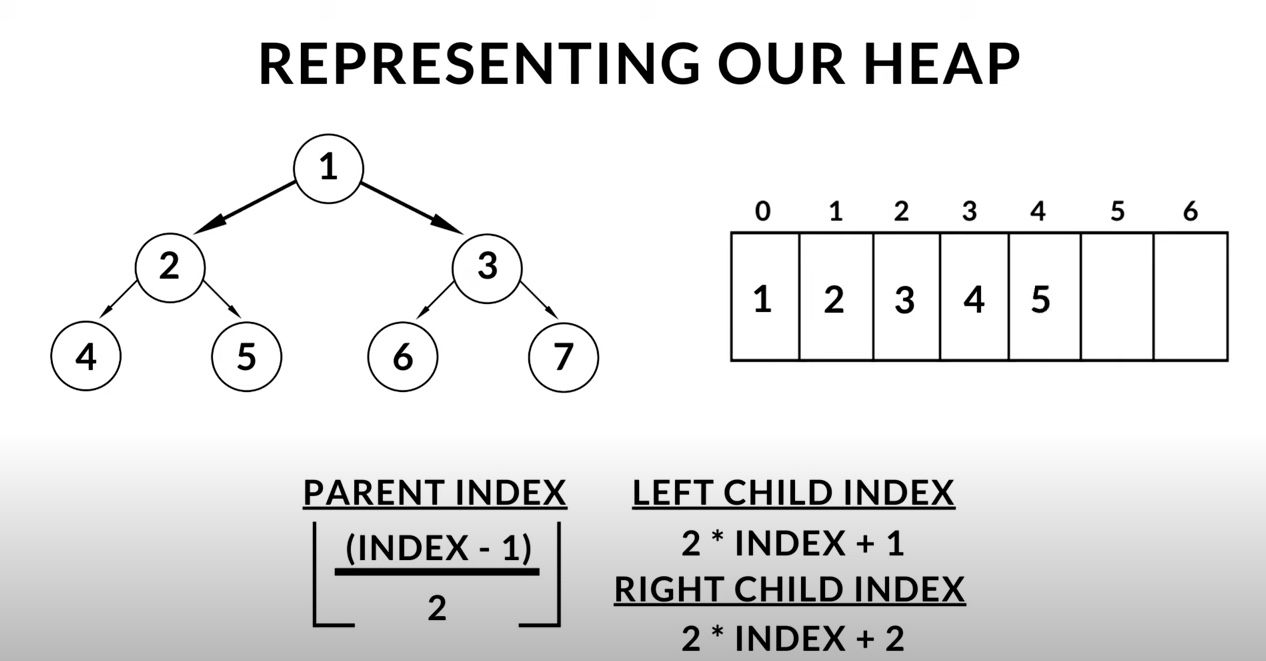
https://www.youtube.com/watch?v=hkyzcLkmoBY

## Code

In [6]:
class MinHeap:
    def __init__(self, capacity) -> None:
        self.storage = [0] * capacity
        self.capacity = capacity
        self.size = 0



    # Find index of a related node
    def getParentIndex(self, childIndex): 
        return (childIndex - 1) // 2
    
    def getLeftChildIndex(self, parentIndex): 
        return 2 * parentIndex + 1
    
    def getRightChildIndex(self, parentIndex): 
        return 2 * parentIndex + 2
    


    # Operations
    def swap(self, index1, index2):
        val1 = self.storage[index1]
        self.storage[index1] = self.storage[index2]
        self.storage[index2] = val1

    def insert(self, data):
        if (self.size == self.capacity):
            raise('Heap is full')
        self.storage[self.size] = data
        self.size += 1
        self.heapifyUp() 


    # Swap with parent until heap is correct
    def heapifyUp(self):
        index = self.size - 1

        while (self.hasParent(index) and self.parent(index) > self.storage[index]): 
            self.swap(self.getParentIndex(index), index)





    # Optional methods for making access easier
    def isFull(self):
        return self.size == self.capacity


    # Booleans for if node exists
    def hasParent(self, childIndex):
        return self.getParentIndex(childIndex)
    
    def hasLeftChild(self, parentIndex):
        return self.getLeftChildIndex(parentIndex) < self.size
    
    def hasRightChild(self, parentIndex):
        return self.getRightChildIndex(parentIndex) < self.size
    
    
    



IndentationError: expected an indented block after function definition on line 35 (3787546844.py, line 43)

## Using heapq package


In [2]:
import heapq

class KthLargest:
    def __init__(self, k: int, nums):
        self.k = k
        self.min_heap = []
        for num in nums:
            self.add(num)

    def add(self, val: int) -> int:
        if len(self.min_heap) < self.k:
            heapq.heappush(self.min_heap, val)
        elif val > self.min_heap[0]:
            heapq.heapreplace(self.min_heap, val)
        return self.min_heap[0]


# Heaps

